# King County House Price Prediction with Linear Regression

#### Data Description

In this dataset the sales price of houses in King County (Seattle) are present. It includes homes sold between May 2014 and May 2015. Before doing anything we should first know about the dataset what it contains what are its features and what is the structure of data.

- price: price of the house. This is our target variable.
- bedrooms: Number of bedrooms
- bathroooms: Number of bathrooms
- sqft_living: Square footage of house
- sqft_lot: Square footage of lot
- floors: Number of floors/ Level
- waterfront: 1 = Waterfront view; 0 = No waterfront view
- view: 1 = House been viewed; 0 = House has not been viewed
- condition: 1 indicates worn out property and 5 excellent
- grade: Overall grade given to the housing unit, based on King County grading system. 1 poor ,13 excellent
- sqft_above: Square footage of house apart from basement
- sqft_below: Square footage of the basement
- yr_built: Year of house built
- yr_renovated: Year of house renovated
- zipcode: Zip code
- lat: Latitude coordination
- long: Longitude coordination
- sqft_living15: Square footage of house in 2015 (implies-- some renovations)
- sqft_lot15: Square footage of lot in 2015 (implies-- some renovations)

## Load the necessary libraries

In [1]:
# libraries for numerical
import pandas as pd  
import numpy as np

# libraries for visualization
import matplotlib.pyplot as plt  
import seaborn as sns

# libraries for machine learning
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics

# to plot the diagrams within the cells
%matplotlib inline

## Load the dataset 

In [2]:
house_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/kc_house_data/kc_house_data.csv')
house_data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## Are there any missing values?

In [3]:
house_data.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Ahh! Looks like we're good to go!

## Exploratory Data Analysis

In [4]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16613 entries, 0 to 16612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          16613 non-null  float64
 1   bedrooms       16613 non-null  int64  
 2   bathrooms      16613 non-null  float64
 3   sqft_living    16613 non-null  int64  
 4   sqft_lot       16613 non-null  int64  
 5   floors         16613 non-null  float64
 6   waterfront     16613 non-null  int64  
 7   view           16613 non-null  int64  
 8   condition      16613 non-null  int64  
 9   grade          16613 non-null  int64  
 10  sqft_above     16613 non-null  int64  
 11  sqft_basement  16613 non-null  int64  
 12  yr_built       16613 non-null  int64  
 13  yr_renovated   16613 non-null  int64  
 14  zipcode        16613 non-null  int64  
 15  lat            16613 non-null  float64
 16  long           16613 non-null  float64
 17  sqft_living15  16613 non-null  int64  
 18  sqft_l

### Timeseries Data

In [5]:
numeric_features = house_data.select_dtypes(include=[np.number])

In [6]:
# list of variables that contain year information
year_feature = [feature for feature in numeric_features if 'yr' in feature or 'year' in feature]
year_feature

['yr_built', 'yr_renovated']

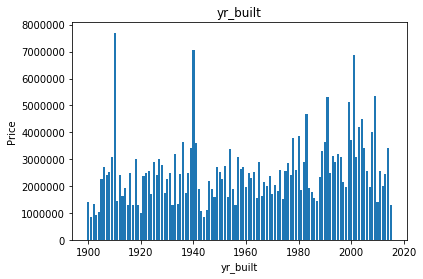

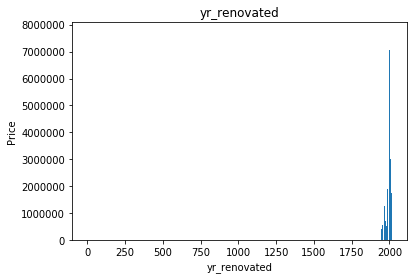

In [7]:
for feature in year_feature:
    data= house_data.copy()
    plt.bar(data[feature], data['price'])
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.title(feature)
    plt.show()

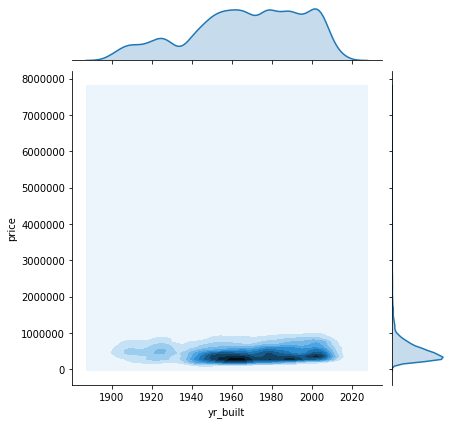

In [18]:
ax = sns.jointplot(x ='yr_built', y = 'price', data=house_data, kind ='kde')
plt.show()

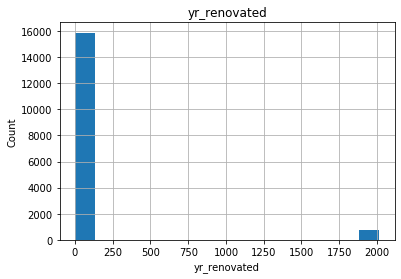

In [19]:
data= house_data.copy()
data['yr_renovated'].hist(bins=15)
plt.xlabel(feature)
plt.ylabel("Count")
plt.title(feature)
plt.show()

**- From the barplot and the jointplot, most houses are built between 1945 to 1965 but they are not too pricey. Rather, the price spiked up sometimes in approximately 1910, 1040 and 2002.**

**- From the barplot and the histogram, we have less than 1000 data ponits available after the year 1750 and around 2002, the price went up to 7200000.**

### Categorical Data

In [20]:
numeric_features = house_data.select_dtypes(include=[np.number])
numeric_features.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [21]:
categorical_feature=[feature for feature in numeric_features if len(house_data[feature].unique()) < 30]
print("Categorical feature Count: {}".format(len(categorical_feature)))
categorical_feature

Categorical feature Count: 7


['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade']

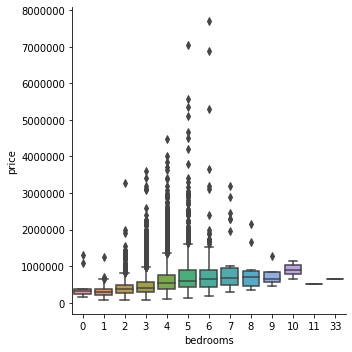

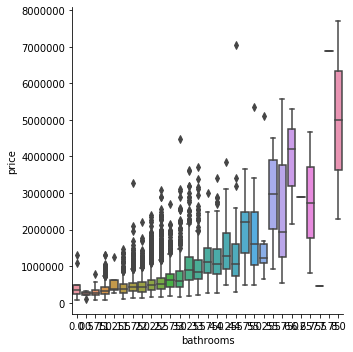

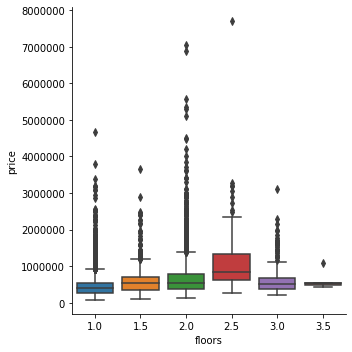

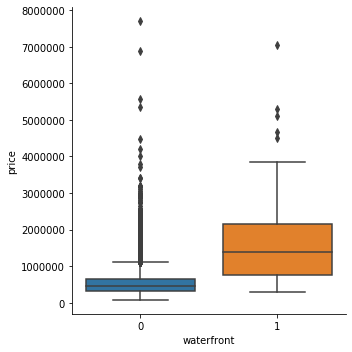

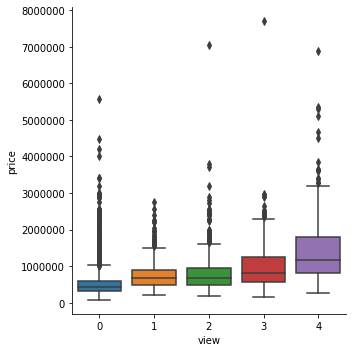

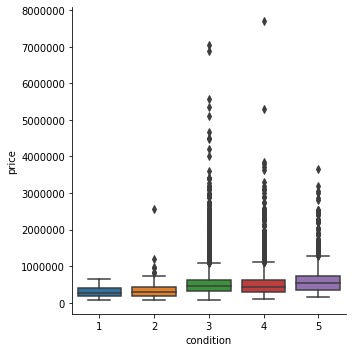

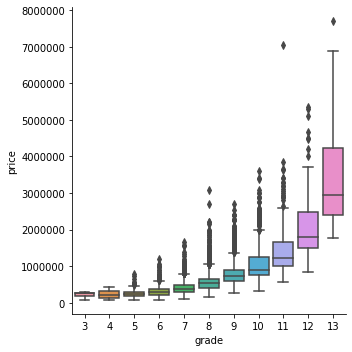

In [22]:
for feature in categorical_feature:
    data= house_data.copy()
    ax = sns.catplot(x=feature, y="price", kind="box", data = data)
    plt.show()

**- Waterfront view is a very important predictor of price of a house. The difference in price of the two types is very noticable.**

**- Although ther are many outliers/ important observations, the mean values show that higher graded houses more expensive ones.**

### Continous Features

#### a. Address Features

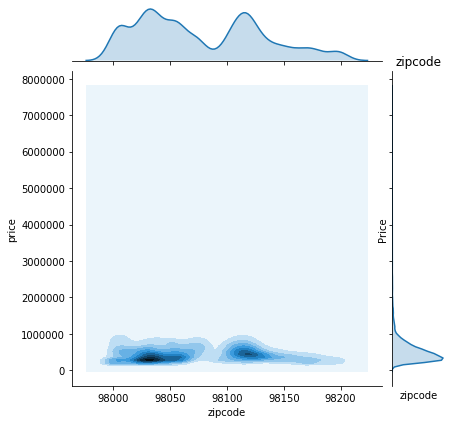

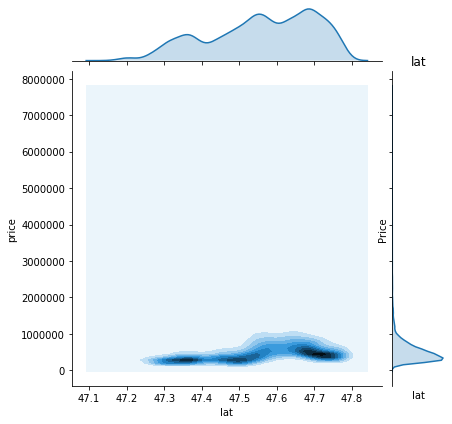

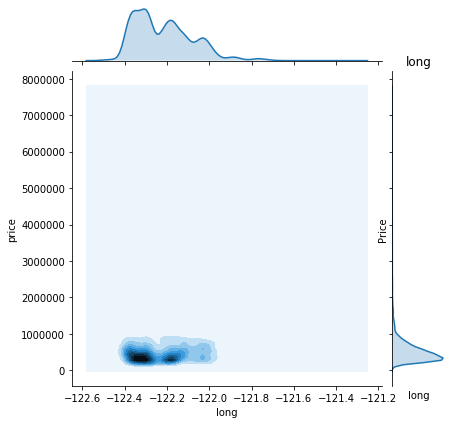

In [23]:
address_features = ['zipcode', 'lat', 'long']

for feature in address_features:
    data = house_data.copy()
    ax = sns.jointplot(x=feature,y='price', data=data, kind = 'kde')
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.title(feature)
    plt.show()

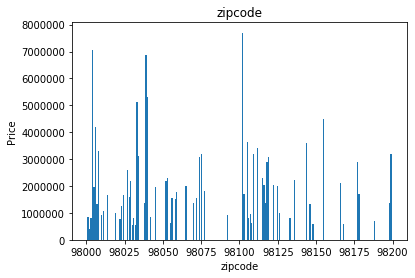

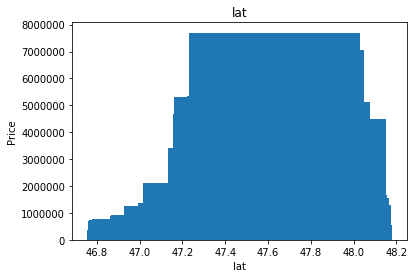

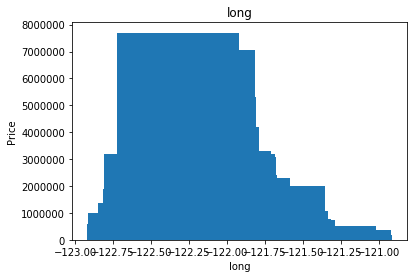

In [24]:
for feature in address_features:
    data= house_data.copy()
    plt.bar(data[feature], data['price'])
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.title(feature)
    plt.show()

**- Most of the expensive house are located in the zipcodes between 98030-98100.**

**- The price went up to 7800000 and from the above two plots, the latitude and logitude of the expensive as well as less expensive houses can be identified.**

#### b. Area size Features

In [25]:
sqft_feature=[feature for feature in numeric_features if feature not in categorical_feature + ['price'] + year_feature + address_features ]
print("Sqft Feature Count: {}".format(len(sqft_feature)))
sqft_feature

Sqft Feature Count: 6


['sqft_living',
 'sqft_lot',
 'sqft_above',
 'sqft_basement',
 'sqft_living15',
 'sqft_lot15']

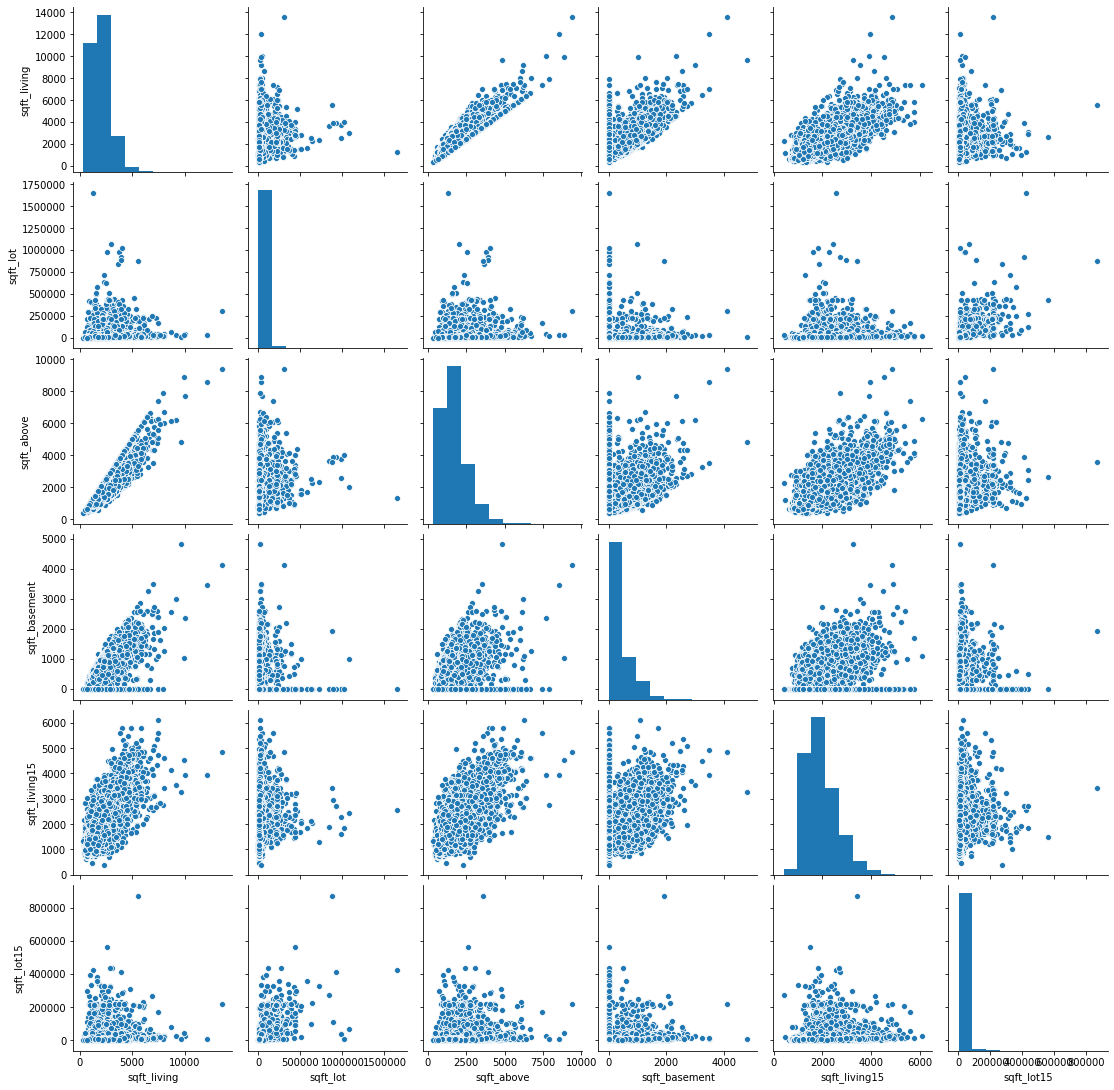

In [26]:
sns.pairplot(data[sqft_feature], palette = 'bwr') 

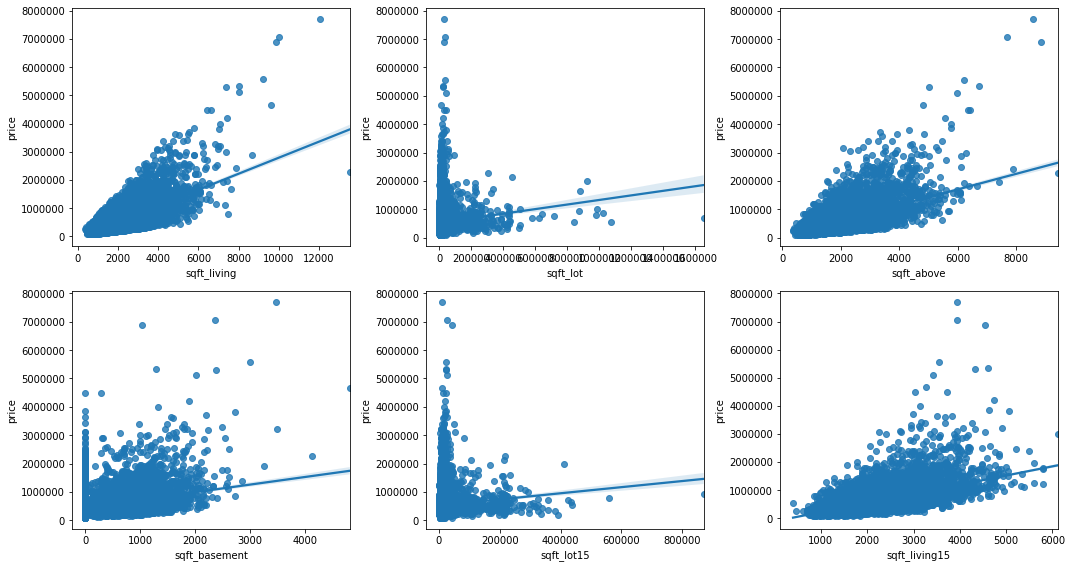

In [27]:
fig, axs = plt.subplots(ncols = 3, nrows = 2, figsize = (15, 8))
sns.regplot(y = data['price'], x = data['sqft_living'], ax = axs[0, 0])
sns.regplot(y = data['price'], x = data['sqft_lot'], ax = axs[0, 1])
sns.regplot(y = data['price'], x = data['sqft_above'], ax = axs[0, 2])
sns.regplot(y = data['price'], x = data['sqft_basement'], ax = axs[1, 0])
sns.regplot(y = data['price'], x = data['sqft_lot15'], ax = axs[1, 1])
sns.regplot(y = data['price'], x = data['sqft_living15'], ax = axs[1, 2])
plt.tight_layout()

**- There's clearly some liner relationship between price of the house and these features: 'sqft_living', 'sqft_above', 'sqft_living15'.**

**- There might be some non-linear relationship for the features 'sqft_lot' and 'sqft_lot15' which we will still will have to figure out. 'sqft_basement' shows a lot of datapoints near 0 which may infer that a lot of houses actually don't have any basements and we will have go back and check our data to be sure here.**

### Correlation Between the features

Let's use spearman correlation figure out any liear/non-linear relationships between the features.

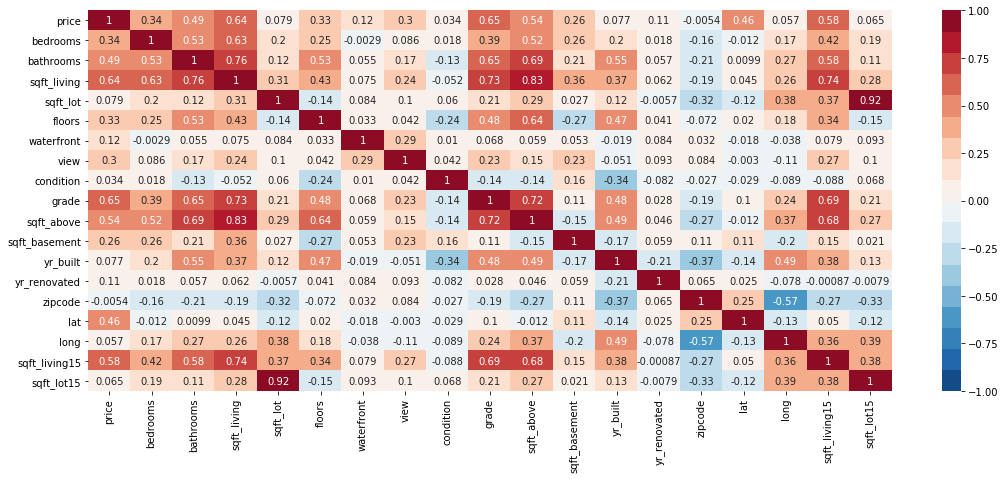

In [28]:
plt.figure(figsize=(18, 7))
sns.heatmap(data.corr(method='spearman'), 
            annot=True, vmin=-1.0, vmax=1.0, cmap=sns.color_palette("RdBu_r", 18))
plt.show()

#### How about all the features vs price?

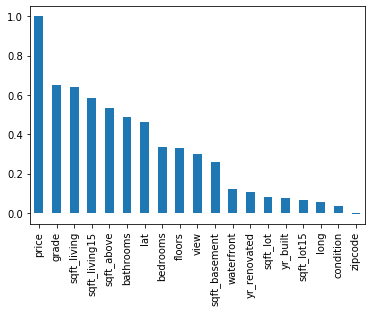

In [29]:
correlation = data.corr(method='spearman')
corr = correlation.price.sort_values(ascending = False)
corr.plot.bar()

**So, if we want we can use these features only as the rest has very little impact on price: 'grade', 'sqft_living', 'sqft_living15', 'sqft_above',
       'bathrooms', 'lat', 'bedrooms', 'floors', 'view', 'sqft_basement'.**

## Model Development

### Train Test Split

In [30]:
X = house_data.drop('price', axis = 1) 
y = house_data['price']

In [31]:
# train_test_split is used to split the dataset into test set and train set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [32]:
print("Original shape of dataset: {}".format(data.shape))         # shape of original dataset
print("Shape of training dataset: {}".format(X_train.shape))      # shape of training dataset after split
print("Shape of testing dataset: {}".format(X_test.shape))        # shape of testing dataset after split

Original shape of dataset: (16613, 19)
Shape of training dataset: (11629, 18)
Shape of testing dataset: (4984, 18)


### Model Building And Training 

In [33]:
model = LinearRegression(normalize = True)     # creating object 'logmodel' for LogisticRegression class
model.fit(X_train,y_train)                     # Fitting the model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

### Prediction

In [34]:
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

### Evaluation Metrics

In [35]:
# Model evaluation for training set
rmse_train = (np.sqrt(mean_squared_error(y_train, y_pred_train)))
r2_train = r2_score(y_train, y_pred_train)

print("Model training performance:")
print("----------------------------------------------------")
print('RMSE of the training set is {}'.format(rmse_train))
print('R2 score of the training set is {}'.format(r2_train))
print("\n")

# Model evaluation for test set
rmse_test = (np.sqrt(mean_squared_error(y_test, y_pred_test)))
r2_test = r2_score(y_test, y_pred_test)

print("Model test performance:")
print("----------------------------------------------------")
print('RMSE of the test set is {}'.format(rmse_test))
print('R2 score of the test set  is {}'.format(r2_test))

Model training performance:
----------------------------------------------------
RMSE of the training set is 198190.5114310525
R2 score of the training set is 0.6936113835541129


Model test performance:
----------------------------------------------------
RMSE of the test set is 207225.30445476476
R2 score of the test set  is 0.7108132188732778


In [36]:
# Examine the first 10 predicted output from the model

output = pd.DataFrame(y_test[0:10])
output['Predicted'] = y_pred_test[0:10]
output['Difference'] = output['Predicted'] - output['price']
print(output, "\n")

           price     Predicted     Difference
12396   943500.0  5.886100e+05 -354889.988841
13614   310000.0  3.542609e+05   44260.900370
14772   807500.0  8.395221e+05   32022.071609
8142    875000.0  1.136307e+06  261306.703976
10605   549995.0  3.681651e+05 -181829.900332
7536   1320000.0  1.010014e+06 -309986.140802
5364    404000.0  4.185839e+05   14583.902414
1799    465000.0  3.756165e+05  -89383.497331
6778   1255000.0  1.059994e+06 -195006.334530
11165   850000.0  9.484757e+05   98475.718774 



### Test a new dataset

In [37]:
test_new = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/kc_house_data/kc_house_new_test_data.csv')
test_new.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,5,3.25,5210,35765,2.5,0,4,5,10,4940,270,1911,0,98136,47.5463,-122.397,2590,10250
1,5,2.00,2800,17788,1.0,0,0,4,8,1400,1400,1963,0,98033,47.6719,-122.163,1760,18282
2,4,2.25,2060,44431,2.0,0,0,3,7,2060,0,1988,0,98077,47.7440,-122.046,2160,45657
3,5,2.00,2360,19899,1.0,0,0,4,7,2360,0,1968,0,98010,47.3299,-122.046,1860,19998
4,4,2.50,2370,6557,2.0,0,0,3,9,2370,0,1998,0,98042,47.4230,-122.155,2370,7378


In [38]:
test_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       4999 non-null   int64  
 1   bathrooms      4999 non-null   float64
 2   sqft_living    4999 non-null   int64  
 3   sqft_lot       4999 non-null   int64  
 4   floors         4999 non-null   float64
 5   waterfront     4999 non-null   int64  
 6   view           4999 non-null   int64  
 7   condition      4999 non-null   int64  
 8   grade          4999 non-null   int64  
 9   sqft_above     4999 non-null   int64  
 10  sqft_basement  4999 non-null   int64  
 11  yr_built       4999 non-null   int64  
 12  yr_renovated   4999 non-null   int64  
 13  zipcode        4999 non-null   int64  
 14  lat            4999 non-null   float64
 15  long           4999 non-null   float64
 16  sqft_living15  4999 non-null   int64  
 17  sqft_lot15     4999 non-null   int64  
dtypes: float

In [39]:
price = model.predict(test_new)

In [40]:
res = pd.DataFrame(price)
res.index = test_new.index # its important for comparison
res.columns = ["price"]
res.to_csv("prediction_results_HP.csv")      # the csv file will be saved locally on the same location where this notebook is located.